In [ ]:
class Graph:
    def __init__(self, startNode, graph, heuristicNodeValue):
         
        self.graph = graph
        self.H=heuristicNodeValue
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}
        
    def aoStarAlgo(self):        
 # starts a recursive AO* algorithm
        self.aoStar(self.start, False)
 
    def getNeighbors(self, v):     
        return self.graph.get(v,'')
    
    def getStatus(self,v):
        return self.status.get(v,0)
    
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) 
    
    def setStatus(self,v, val):
        self.status[v]=val
 
    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value 
        
    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:",self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")
    def computeMinimumCostChildNodes(self, v):     
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True

        for nodeInfoTupleList in self.getNeighbors(v):# iterate over all the set of child node/s
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)

            if flag==True:  
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList
                flag=False
            else:                                
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList  

        return minimumCost, costToChildNodeListDict[minimumCost] 
    def aoStar(self, v, backTracking):     
# AO* algorithm for a start node and backTracking status flag
        
        print("HEURISTIC VALUES  :", self.H)
        print("SOLUTION GRAPH    :", self.solutionGraph)
        print("PROCESSING NODE   :", v)
        print("--------------------------------------------------------------------")
        
        if self.getStatus(v) >= 0:       
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))
            
            solved=True                   
# check the Minimum Cost nodes of v are solved   
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False
            
            if solved==True:            
                self.setStatus(v,-1)    
                self.solutionGraph[v]=childNodeList 
            
            if v!=self.start:             
                self.aoStar(self.parent[v], True)   
                
            if backTracking==False:    
                for childNode in childNodeList:  
                    self.setStatus(childNode,0)   
                    self.aoStar(childNode, False)

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}  # Heuristic values of Nodes 
graph2 = {                                        # Graph of Nodes and Edges 
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],      # Neighbors of Node 'A', B, C & D with repective weights 
    'B': [[('G', 1)], [('H', 1)]],                # Neighbors are included in a list of lists
    'D': [[('E', 1), ('F', 1)]]                   # Each sublist indicate a "OR" node or "AND" nodes
}
G2 = Graph(graph2, h2, 'A')
G2.aoStarAlgo()                                  
G2.printSolution() 

# local weighted regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(X0,X,Y,tau):
    X0 = [1,X0]
    X = [[1,i] for i in X]
    X = np.asarray(X)
    xw = (X.T)*np.exp(np.sum((X-X0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@X)@xw@Y@X0
    return beta
def draw(tau):
    prediction = [local_regression(X0,X,Y,tau) for X0 in domain]
    plt.plot(X,Y,'o',color='black')
    plt.plot(domain,prediction,color='red')
    plt.show()
X = np.linspace(-3,3,num=1000)
domain = X
Y = np.log(np.abs(X**2-1)+0.5)
draw(10)
draw(0.1)

# EM algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
x = pd.DataFrame(iris["data"],columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(iris["target"],columns=["target"])

model = KMeans(n_clusters=3)
model.fit(x)
predicted = model1.predict(x_test)
print("Km Accuracy score: ",metrics.accuracy_score(predicted,y_test))
print("Km Confusion matrix:\n",metrics.confusion_matrix(predicted,y_test))

colormap = np.array(['red','lime','black'])
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.scatter(x["petal_length"],x["petal_width"],c=colormap[y.target],s=40)
plt.title("real cluster")


plt.subplot(1,3,2)
plt.scatter(x["petal_length"],x["petal_width"],c=colormap[model.labels_],s=40)
plt.title("KM cluster")


scaler = StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa,columns = x.columns)
gmm = GaussianMixture(n_components=40)
gmm.fit(xs)

model2 = GaussianMixture(n_components=3)
model2.fit(x_train,y_train)
predicted = model2.predict(x_test)
print("gm Accuracy score: ",metrics.accuracy_score(predicted,y_test))
print("gm Confusion matrix:\n",metrics.confusion_matrix(predicted,y_test))

plt.subplot(1,3,3)
plt.scatter(x["petal_length"],x["petal_width"],c=colormap[0],s=40)
plt.title("GMM cluster")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def local_regression(x0,x,y,tau):
    x0 = [1,x0]
    x = [[1,i] for i in x]
    x = np.asarray(x)
    xw = (x.T)*np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@x)@xw@y@x0
    return beta
def draw(tau):
    predicted = [local_regression(x0,x,y,tau) for x0 in domain]
    plt.plot(x,y,'o',color='black')
    plt.plot(domain,predicted,color='red')
    plt.show()
x = np.linspace(-3,3,num=1000)
domain = x
y = np.log(np.abs(x**2 -1)+0.5)
draw(10)
draw(0.1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

data = pd.read_csv(r"C:\Users\manit\Downloads\tennisdata.csv")
data.head(5)

In [ ]:
x = data.iloc[:,:-1]
x.head(5)

In [ ]:
y = data.iloc[:,-1]
y.head(5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_out = LabelEncoder()
x.Outlook = le_out.fit_transform(x.Outlook)

le_temp = LabelEncoder()
x.Temperature = le_temp.fit_transform(x.Temperature)

le_hum = LabelEncoder()
x.Humidity = le_hum.fit_transform(x.Humidity)

le_windy = LabelEncoder()
x.Windy = le_windy.fit_transform(x.Windy)

le_play = LabelEncoder()
y = le_play.fit_transform(y)

print(x.head(5))
print(y)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
model = GaussianNB()
model.fit(xtrain, ytrain)
predicted = model.predict(xtest)

In [ ]:
print("Accuracy score:",accuracy_score(predicted,ytest))

# back propagation

In [ ]:
import numpy as np
x = np.array(([2,9],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)
x = x/np.amax(x)
y = y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative_sigmoid(x):
    return x*(1-x)

wh = np.random.uniform(size=(2,3))
bh = np.random.uniform(size=(1,3))
wout = np.random.uniform(size=(3,1))
bout = np.random.uniform(size=(1,1))

epoch = 5000
lr = 0.1

for i in range(epoch):
    hinp = np.dot(x,wh)+bh
    hlayer_act = sigmoid(hinp)
    
    outinp = np.dot(hlayer_act,wout)+bout
    output = sigmoid(outinp)
    
    hiddergrad = derivative_sigmoid(hlayer_act)
    outputgrad = derivative_sigmoid(output)
    
    EO = y-output
    d_output = EO*outputgrad
    
    EH = d_output.dot(wout.T)
    d_hidden = EH*hiddergrad
    
    wout+= hlayer_act.T.dot(d_output)*lr
    wh+=x.T.dot(d_hidden)*lr
print("input:\n",str(x))
print("output:\n",str(y))
print("predicted:\n",str(output_act))

In [ ]:
import numpy as np
x = np.array(([2,9],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)
x = x/np.amax(x)
y = y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative_sigmoid(x):
    return x*(1-x)

epoch = 5000
lr = 0.1
wh = np.random.uniform(size=(2,3))
bh = np.random.uniform(size=(1,3))
wout = np.random.uniform(size=(3,1))
bout = np.random.uniform(size=(1,1))

for i in range(epoch):
    hinp = np.dot(x,wh)+bh
    hlayer_act = sigmoid(hinp)
    
    outinp = np.dot(hlayer_act,wout)+bout
    output = sigmoid(outinp)
    
    hidden_grad = derivative_sigmoid(hlayer_act)
    output_grad = derivative_sigmoid(output)
    
    EO = y-output
    d_output = EO*output_grad
    
    EH = d_output.dot(wout.T)
    d_hidden = EH*hidden_grad
    
    wout+=hlayer_act.T.dot(d_output)*lr
    wh+=x.T.dot(d_hidden)*lr
print("input:\n",str(x))
print("output:\n",str(y))
print("predicted:\n",output)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0,x,y,tau):
    x0 = [1,x0]
    x = [[1,i] for i in x]
    x = np.asarray(x)
    xw = (x.T)*np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@x)@xw@y@x0
    return beta
def draw(tau):
    prediction = [local_regression(x0,x,y,tau) for x0 in domain]
    plt.plot(x,y,'o',color='black')
    plt.plot(domain,prediction,color='red')
    plt.show()
x = np.linspace(-3,3,num=1000)
domain = x
y = np.log(np.abs(x**2-1)+0.5)
draw(10)
draw(0.1)

In [ ]:
def astarAlgo(startNode, stopNode):
    openset = set(startNode)
    closedset = set()
    g = {}
    p = {}
    g[startNode]=0
    p[startNode]=startNode
    
    while(len(openset)>0):
        n = None
        for v in openset:
            if n==None or g[v]+heuristic(v)<g[n]+heuristic(n):
                n = v
        if n==stopNode or graphNode[n]==None:
            pass
        else:
            for m,w in getNeigh(n):
                if m not in openset and m not in closedset:
                    openset.add(m)
                    g[m] = g[n]+w
                    p[m] = n
                else:
                    if g[m]>g[n]+w:
                        g[m] = g[n]+w
                        p[m] = n
                        if m in closedset:
                            closedset.remove(m)
                            openset.add(m)
        if n==None:
            print("PDE")
            return None
        if n==stopNode:
            path = []
            while p[n]!=n:
                path.append(n)
                n = p[n]
            path.append(startNode)
            path.reverse()
            print("path:",path)
            return path
        openset.remove(n)
        closedset.add(n)
    print("PDE")
    return None
def getNeigh(v):
    if v in graphNode:
        return graphNode[v]
    else:
        return None
def heuristic(v):
    h = {
        'A':9,
        'B':6,
        'C':3,
        'D':2,
        'E':0
    }
    return h[v]
graphNode = {
    'A':[('B',3),('D',10)],
    'B':[('A',3),('C',4),('E',6)],
    'C':[('B',4),('E',3)],
    'D':[('A',10),('E',2)]
}
astarAlgo('A','E')

In [ ]:
import csv
with open(r"C:\Users\manit\Downloads\trainingexamples.csv") as f:
    csv = csv.reader(f)
    data = list(csv)
    
    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]
    
    for i in data:
        if i[-1]=='Yes':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    specific[j] = '?'
                    general[j][j] = '?'
        if i[-1]=='No':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = '?'
        print("Step "+str(data.index(i)+1)+" Candidate elimination Algo")
        print("general:",general)
        print("specific:",specific)
        
    gh = [] # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("final specific:",specific)
    print("final general:",gh)

In [ ]:
import numpy as np
x = np.array(([2,3],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)
x = x/np.amax(x)
y = y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative_sigmoid(x):
    return x*(1-x)

epoch = 6000
lr = 0.1
wh = np.random.uniform(size=(2,3))
bh = np.random.uniform(size=(1,3))
wout = np.random.uniform(size=(3,1))
bout = np.random.uniform(size=(1,1))

for i in range(epoch):
    hinp = np.dot(x,wh)+bh
    hlayer_act = sigmoid(hinp)
    
    outinp = np.dot(hlayer_act,wout)+bout
    output = sigmoid(outinp)
    
    hidden_grad = derivative_sigmoid(hlayer_act)
    output_grad = derivative_sigmoid(output)
    
    EO = y-output
    d_output = EO*output_grad
    
    EH = d_output.dot(wout.T)
    d_hidden = EH*hidden_grad
    
    wout+=hlayer_act.T.dot(d_output)*lr
    wh+=x.T.dot(d_hidden)*lr

print("input:\n",str(x))
print("actual output:\n",str(y))
print("predicted output:\n",output)


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv(r"C:\Users\manit\Downloads\tennisdata.csv")
data

In [ ]:
x = data.iloc[:,:-1]
x

In [ ]:
y = data.iloc[:,-1]
y

In [ ]:
le_out1 = LabelEncoder()
x.Outlook = le_out1.fit_transform(x.Outlook)

le_temp1 = LabelEncoder()
x.Temperature = le_temp1.fit_transform(x.Temperature)

le_hum1 = LabelEncoder()
x.Humidity = le_hum1.fit_transform(x.Humidity)

le_wind1 = LabelEncoder()
x.Windy = le_wind1.fit_transform(x.Windy)

x.head(5)

In [ ]:
y_le = LabelEncoder()
y = y_le.fit_transform(y)
y

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
model = GaussianNB()
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
pred

In [ ]:
ytest

In [ ]:
print("accuracy score:",accuracy_score(pred,ytest))

In [ ]:
model.score(xtest,ytest)

In [ ]:
import csv
with open(r"C:\Users\manit\Downloads\trainingexamples.csv") as f:
    csv = csv.reader(f)
    data = list(csv)
    
    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]
    
    for i in data:
        if i[-1] == 'Yes':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    specific[j] = '?'
                    general[j][j] = '?'
        if i[-1] == 'No':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = '?'
        print("Step "+str(data.index(i)+1)+" candidate eli algo")
        print("specific:",specific)
        print("general:\n",general)
    gh = []
    for i in general:
        for j in i:
            if j!='?':
                gh.append(i)
                break
    print("Final specific hypo:\n",specific)
    print("Final general hypo:\n",gh)

In [ ]:
def astarAlgo1(startNode, stopNode):
    openset = set(startNode)
    closedset = set()
    g = {}
    p = {}
    g[startNode] = 0
    p[startNode] = startNode
    
    while(len(openset)>0):
        n = None
        for v in openset:
            if n==None or g[v]+heuristic(v)<g[n]+heuristic(n):
                n = v
        if n==stopNode or graphNode[n]==None:
            pass
        else:
            for m,w in getNeigh(n):
                if m not in openset and m not in closedset:
                    openset.add(m)
                    g[m] = g[n]+w
                    p[m] = n
                else:
                    if g[m]>g[n]+w:
                        g[m] = g[n]+w
                        p[m] = n
                        if m in closedset:
                            closedset.remove(m)
                            openset.add(m)
        if n==None:
            print("PDE")
            return None
        if n==stopNode:
            path = []
            while p[n]!=n:
                path.append(n)
                n = p[n]
            path.append(startNode)
            path.reverse()
            print("Path:",path)
            return path
        openset.remove(n)
        closedset.add(n)
    print("PDE")
    return None

def getNeigh(v):
    if v in graphNode:
        return graphNode[v]
    else:
        return None

def heuristic(v):
    h = {
        'A':9,
        'B':6,
        'C':3,
        'D':2,
        'E':0
    }
    return h[v]

graphNode = {
    'A':[('B',3),('D',10)],
    'B':[('A',3),('C',4),('E',6)],
    'C':[('B',4),('E',3)],
    'D':[('A',10),('E',2)]
}
astarAlgo1('A','E')

In [ ]:
class graph:
    def __init__(self,graph, heuristicNodeList, start):
        self.start = start
        self.graph = graph
        self.H = heuristicNodeList
        self.p = {}
        self.solu = {}
        self.status = {}
        
    def getNeigh(self, n):
        return self.graph.get(n,'')
    
    def getHeuristicNodeValue(self,n):
        return self.H.get(n,0)
    
    def getStatus(self,v):
        return self.status.get(v,0)
    
    def setStatus(self,v,value):
        self.status[v] = value
        
    def setHeuristicNodeValue(self,n,value):
        self.H[n] = value
    
    def AOstarAlgo(self):
        self.aosta(self.start, False)
    
    def printSolution(self):
        print("For graph Solution, traverse from start Node",self.start)
        print(self.solu)
        print("-------------------------------------------------------")
    
    def getMinimumChildNodeValue(self,v):
        minimumCost = 0
        minimumCostChildNodeListDict1 = {}
        minimumCostChildNodeListDict1[minimumCost] = []
        flag = True
        
        for tuple in self.getNeigh(v):
            cost = 0
            nodeList = []
            for c,w in tuple:
                cost=cost+self.getHeuristicNodeValue(c)+w
                nodeList.append(c)
            
            if flag==True:
                minimumCost = cost
                minimumCostChildNodeListDict1[minimumCost] = nodeList
                flag = False
            else:
                if minimumCost>cost:
                    minimumCost = cost
                    minimumCostChildNodeListDict1[minimumCost] = nodeList
                    
        return minimumCost, minimumCostChildNodeListDict1[minimumCost]
    
    def aosta(self, v, backtracking):
        print("Heuristic Values:",self.H)
        print("solution:",self.solu)
        print("processing Node:",v)
        
        if self.getStatus(v)>=0:
            minimumCost, childNodeList1 = self.getMinimumChildNodeValue(v)
            self.setHeuristicNodeValue(v,minimumCost)
            self.setStatus(v,len(childNodeList1))
            solved = True
            
            for childNode1 in childNodeList1:
                self.p[childNode1] = v
                if self.getStatus(childNode1)!=-1:
                    solved = solved & False
            
            if solved == True:
                self.setStatus(v,-1)
                self.solu[v] = childNodeList1
            
            if v!=self.start:
                self.aosta(self.p[v], True)
            
            if backtracking==False:
                for childNode in childNodeList1:
                    self.setStatus(childNode,0)
                    self.aosta(childNode,False)

h2 = {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}   
graph2 = {                                        
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'D': [[('E', 1), ('F', 1)]]                   
}
 
G2 = graph(graph2, h2, 'A')                       
G2.AOstarAlgo()                                 
G2.printSolution()        

In [ ]:
import numpy as np
x = np.array(([2,9],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)
x = x/np.amax(x)
y = y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative_sigmoid(x):
    return x*(1-x)

epoch = 6000
lr = 0.1
wh = np.random.uniform(size=(2,3))
bh = np.random.uniform(size=(1,3))
wout = np.random.uniform(size=(3,1))
bout = np.random.uniform(size=(1,1))

for i in range(epoch):
    hinp = np.dot(x,wh)+bh
    hlayer_act = sigmoid(hinp)
    
    outinp = np.dot(hlayer_act,wout)+bout
    output = sigmoid(outinp)
    
    hidden_grad = derivative_sigmoid(hlayer_act)
    output_grad = derivative_sigmoid(output)
    
    EO = y-output
    d_output = EO*output_grad
    
    EH = d_output.dot(wout.T)
    d_hidden = EH*hidden_grad
    
    wout+= hlayer_act.T.dot(d_output)*lr
    wh+=x.T.dot(d_hidden)*lr

print("input:\n",str(x))
print("actual output:\n",str(y))
print("predicted output:\n",output)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def local_regression(x0,x,y,tau):
    x0 = [1,x0]
    x = [[1,i] for i in x]
    x = np.asarray(x)
    xw = (x.T)*np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@x)@xw@y@x0
    return beta

def draw(tau):
    prediction = [local_regression(x0,x,y,tau) for x0 in domain]
    plt.plot(x,y,'o',color='black')
    plt.plot(domain, prediction,color='red')
    plt.show()
    
x = np.linspace(-3,3,num=1000)
domain = x
y = np.log(np.abs(x**2-1)+0.5)
draw(10)
draw(0.1)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from collections import Counter
from pprint import pprint

def id3(df, attr_name, target_attr, default_class = None):
    
    cnt = Counter(x for x in df[target_attr])
    if len(cnt)==1:
        return next(iter(cnt))
    
    elif df.empty or (not attr_name):
        return default_class
    
    else:
        gain = mutual_info_classif(df[attr_name],df[target_attr],discrete_features=True)
        max_gain_index = gain.tolist().index(max(gain))
        
        best_attr = attr_name[max_gain_index]
        tree = {best_attr:{}}
        
        remain_attr = [i for i in attr_name if i!=best_attr]
        
        for attr_value, sub_data in df.groupby(best_attr):
            subtree = id3(sub_data, remain_attr ,target_attr, default_class)
            tree[best_attr][attr_value] = subtree
    return tree

data = pd.read_csv(r"C:\Users\manit\Downloads\p-tennis (1).csv")
attr_names = data.columns.tolist()
attr_names.remove('PlayTennis')
print(attr_names)

for colname in data.select_dtypes('object'):
    data[colname], _ = data[colname].factorize()
    
print("the factorized dataset:\n",data)

tree = id3(data,attr_names,"PlayTennis")
print("the tree structure:\n")
pprint(tree)

In [ ]:
import csv
with open(r"C:\Users\manit\Downloads\trainingexamples.csv") as file:
    csvData = csv.reader(file)
    data = list(csvData)
    
    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]
    
    for i in data:
        if i[-1]=='Yes':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    specific[j] = '?'
                    general[j][j] = '?'
        if i[-1]=='No':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = '?'
                    
        print("Step "+str(data.index(i)+1)+" candidate elimination Algo")
        print("specific :",specific)
        print("general: \n",general)
        
    gh = []
    for i in general:
        for j in i:
            if j!='?':
                gh.append(i)
                break
    print("Final specific:\n",specific)
    print("Final general:\n",gh)

In [ ]:
class graph3:
    def __init__(self, graph, start, heuristicNodeList):
        self.graph = graph
        self.start = start
        self.H = heuristicNodeList
        self.p = {}
        self.solu = {}
        self.status = {}
        
    def getNeigh(self, n):
        return self.graph.get(n,'')
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0)
    def getStatus(self, v):
        return self.status.get(v,0)
    def setStatus(self, v, value):
        self.status[v] = value
    def setHeuristicNodeValue(self, n, value):
        self.H[n] = value
    def ApplyAO(self):
        self.aostar2(self.start, False)
    def printSolution(self):
        print("For graph solution, traverse node from start Node", self.start)
        print(self.solu)
        print("-------------------------------------------------\n")
    def minCostToChildNode(self, v):
        minCost = 0
        minCostChildNodeListDict = {}
        minCostChildNodeListDict[minCost]=[]
        flag = True
        
        for tuple in self.getNeigh(v):
            cost=0
            nodeList = []
            for c,w in tuple:
                cost+=self.getHeuristicNodeValue(c)+w
                nodeList.append(c)
            if flag==True:
                minCost = cost
                minCostChildNodeListDict[minCost] = nodeList
                flag = False
            else:
                if minCost>cost:
                    minCost = cost
                    minCostChildNodeListDict[minCost] = nodeList
        
        return minCost, minCostChildNodeListDict[minCost]
    
    def aostar2(self, v, backTracking):
        print("heuristic node list:",self.H)
        print("solution graph:", self.solu)
        print("processing node:", v)
        
        if self.getStatus(v)>=0:
            minCost, childNodeList = self.minCostToChildNode(v)
            self.setHeuristicNodeValue(v,minCost)
            self.setStatus(v,len(childNodeList))
            solved = True
            
            for childNode in childNodeList:
                self.p[childNode] = v
                if self.getStatus(childNode)!=-1:
                    solved = solved&False
                
            if solved == True:
                self.setStatus(v,-1)
                self.solu[v] = childNodeList
            if v!=self.start:
                self.aostar2(self.p[v], True)
            
            if backTracking==False:
                for childNode in childNodeList:
                    self.setStatus(childNode, 0)
                    self.aostar2(childNode, False)
                    
h = {
    'A':1,
    'B':6,
    'C':12,
    'D':10,
    'E':4,
    'F':4,
    'G':5,
    'H':7
}
g = {
    'A':[[('B',1),('C',1)],[('D',1)]],
    'B':[[('E',1)],[('F',1)]],
    'D':[[('G',1),('H',1)]]
}
obj = graph3(g,'A',h)
obj.ApplyAO()
obj.printSolution()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
x = pd.DataFrame(iris.data, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

plt.figure(figsize=(14,5))
colormap = np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(x.sepal_length, x.sepal_width, c=colormap[y.target])
plt.title('sepal plot')

plt.subplot(1,2,2)
plt.scatter(x.petal_length, x.petal_width, c=colormap[y.target])
plt.title('petal plot')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
km.fit(x)
print("accuracy score:",metrics.accuracy_score(km.labels_, y.target))
print("confusion matrix:\n", metrics.confusion_matrix(km.labels_, y.target))

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.scatter(x.petal_length, x.petal_width, c=colormap[y.target], s=40)
plt.title("real cluster")

plt.subplot(1,3,2)
plt.scatter(x.petal_length, x.petal_width, c=colormap[km.labels_], s=40)
plt.title("km cluster")

scaler = StandardScaler()
xsa = scaler.fit_transform(x)
xs = pd.DataFrame(xsa, columns=x.columns)

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_labels = gmm.predict(xs)

print("accuracy score:",metrics.accuracy_score(gmm_labels, y.target))
print("confusion matrix:\n", metrics.confusion_matrix(gmm_labels, y.target))
plt.subplot(1,3,3)
plt.scatter(x.petal_length, x.petal_width, c=colormap[gmm_labels], s=40)
plt.title("gmm cluster")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lin_reg(x0, x, y, tau):
    x0 = [1,x0]
    x = [[1,i] for i in x]
    x = np.asarray(x)
    xw = (x.T)*np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@x)@xw@y@x0
    return beta
def draw(tau):
    pred = [lin_reg(x0, x, y, tau) for x0 in domain]
    plt.plot(x,y,'o',color='black')
    plt.plot(domain, pred, color='red')
    plt.show()
x = np.linspace(-3,3,num=1000)
domain = x
y = np.log(np.abs(x**2-1)+0.5)
draw(10)
draw(0.1)

In [ ]:
import numpy as np
x = np.array(([2,9],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)
x = x/np.amax(x)
y = y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def derivative_sigmoid(x):
    return x*(1-x)

epoch = 6000
lr = 0.1

wh = np.random.uniform(size=(2,3))
bh = np.random.uniform(size=(1,3))
wout = np.random.uniform(size=(3,1))
bout = np.random.uniform(size=(1,1))

for i in range(epoch):
    hinp = np.dot(x,wh)+bh
    hlayer = sigmoid(hinp)
    
    outinp = np.dot(hlayer, wout)+bout
    output = sigmoid(outinp)
    
    hidden_grad = derivative_sigmoid(hlayer)
    output_grad = derivative_sigmoid(output)
    
    EO = y-output
    d_outout = EO*output_grad
    
    EH = d_outout.dot(wout.T)
    d_hidden = EH*hidden_grad
    
    wout+=hlayer.T.dot(d_outout)*lr
    wh+=x.T.dot(d_hidden)*lr
    
print("input:",str(x))
print("output:",str(y))
print("predicted:",output)

In [ ]:
import csv
with open(r"C:\Users\manit\Downloads\trainingexamples.csv") as file:
    csvData = csv.reader(file)
    data = list(csvData)
    
    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]
    
    for i in data:
        if i[-1]=='Yes':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    specific[j]='?'
                    general[j][j] = '?'
        if i[-1]=='No':
            for j in range(len(specific)):
                if i[j]!=specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = '?'
        print("\nstep "+str(data.index(i)+1)+" candidate eli algo")
        print("specific:",specific)
        print("general:",general)
        
    gh = []
    for i in general:
        for j in i:
            if j!='?':
                gh.append(i)
                break
    print("final specific:\n",specific)
    print("final general:\n", gh)
    

In [ ]:
def astar(startNode, stopNode):
    openset = set(startNode)
    closedset= set()
    g = {}
    p = {}
    g[startNode] = 0
    p[startNode] = startNode
    
    while(len(openset)>0):
        n = None
        for v in openset:
            if n==None or g[v]+heuristic(v)<g[n]+heuristic(n):
                n = v
        if n==stopNode or graphNode[n]==None:
            pass
        else:
            for m,w in getNeigh(n):
                if m not in openset and m not in closedset:
                    openset.add(m)
                    g[m] = g[n]+w
                    p[m] = n
                else:
                    if g[m]>g[n]+w:
                        g[m] = g[n]+w
                        p[m] = n
                        if m in closedset:
                            closedset.remove(m)
                            openset.add(m)
        if n==None:
            print("PDE")
            return None
        if n==stopNode:
            path = []
            while p[n]!=n:
                path.append(n)
                n = p[n]
            path.append(startNode)
            path.reverse()
            print(path)
            return path
        openset.remove(n)
        closedset.add(n)
    print("PDE")
    return None
def getNeigh(v):
    if v in graphNode:
        return graphNode[v]
    else:
        return None
def heuristic(n):
    H_dist = {
        'A': 10,
        'B': 8,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0
    }

    return H_dist[n]

#Describe your graph here
graphNode = {
    
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3), ('D', 2)],
    'C': [('D', 1), ('E', 5)],
    'D': [('C', 1), ('E', 8)],
    'E': [('I', 5), ('J', 5)],
    'F': [('G', 1),('H', 7)] ,
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5), ('J', 3)],

}
astar('A', 'J')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def local_reg(x0,x,y,tau):
    x0 = [1,x0]
    x = [[1,i] for i in x]
    x = np.asarray(x)
    xw = (x.T)*np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau))
    beta = np.linalg.pinv(xw@x)@xw@y@x0
    return beta
def draw(tau):
    pred = [local_reg(x0,x,y,tau) for x0 in domain]
    plt.plot(x,y,'o',color='black')
    plt.plot(domain, pred, color='red')
    plt.show()
x = np.linspace(-3,3,num=1000)
domain = x
y = np.log(np.abs(x**2-1)+0.5)
draw(10)
draw(0.1)

In [ ]:
import pandas as pd
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
from pprint import pprint

def id3(df, attr_name, target_attr, default_class=None):
    cnt = Counter(x for x in df[target_attr])
    if len(cnt)==1:
        return next(iter(cnt))
    elif df.empty or (not attr_name):
        return default_class
    else:
        gain = mutual_info_classif(df[attr_name], df[target_attr], discrete_features=True)
        max_gain = gain.tolist().index(max(gain))
        best_att = attr_name[max_gain]
        tree = {best_att:{}}
        remain_att = [i for i in attr_name if i!=best_att]
        
        for att_val, subdata in df.groupby(best_att):
            subtree = id3(subdata, remain_att, target_attr, default_class)
            tree[best_att][att_val] = subtree
        
        return tree


data = pd.read_csv(r"C:\Users\manit\Downloads\p-tennis (1).csv")
attr_name = data.columns.tolist()
print(attr_name)
attr_name.remove('PlayTennis')

for colname in data.select_dtypes('object'):
    data[colname], _ = data[colname].factorize()
    
print(data)

tree = id3(data, attr_name, 'PlayTennis')
print("tree str\n")
pprint(tree)

In [ ]:
import numpy as np

x = np.array(([2,9],[1,5],[3,6]),dtype=float)
y = np.array(([92],[86],[89]),dtype=float)
x = x/np.amax(x)
y = y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))
def der_sig(x):
    return x*(1-x)
epoch = 6000
lr = 0.1

wh = np.random.uniform(size=(2,3))
bh = np.random.uniform(size=(1,3))
wout = np.random.uniform(size=(3,1))
bout = np.random.uniform(size=(1,1))

for i in range(epoch):
    hinp = np.dot(x,wh)+bh
    hlayer_act = sigmoid(hinp)
    
    outinp = np.dot(hlayer_act, wout)+bout
    output = sigmoid(outinp)
    
    hidden_grad = der_sig(hlayer_act)
    output_grad = der_sig(output)
    
    EO = y-output
    d_output = EO*output_grad
    
    EH = d_output.dot(wout.T)
    d_hidden = EH*hidden_grad
    
    wout+=hlayer_act.T.dot(d_output)*lr
    wh+=x.T.dot(d_hidden)*lr
    
print(x)
print(y)
print(output)

In [5]:
class Graph:
    def __init__(self, graph, start, heuristicNodeList):
        self.graph = graph
        self.start = start
        self.H =heuristicNodeList
        self.p = {}
        self.solu = {}
        self.status={}
        
    def getNeigh(self, n):
        return self.graph.get(n,'')
    def getHeur(self, n):
        return self.H.get(n,0)
    def getStatus(self, v):
        return self.status.get(v,0)
    def setStatus(self, v, value):
        self.status[v] = value
    def setHeur(self, n, value):
        self.H[n] = value
    def ApplyAO(self):
        self.aostar(self.start, False)
    def printSolution(self):
        print("for graph solu", self.start)
        print(self.solu)
        print("------------------------------------------------------")
    def comp(self, v):
        minCost = 0
        costtominchildNodelist = {}
        costtominchildNodelist[minCost] = []
        flag = True
        
        for tuple in self.getNeigh(v):
            cost  = 0
            nodeList = []
            for c,w in tuple:
                cost+=self.getHeur(c)+w
                nodeList.append(c)
            if flag == True:
                minCost = cost
                costtominchildNodelist[minCost] = nodeList
                flag = False
            else:
                if minCost>cost:
                    minCost = cost
                    costtominchildNodelist[minCost] = nodeList
        return minCost, costtominchildNodelist[minCost]
    
    def aostar(self, v, backTracking):
        print("heu",self.H)
        print("sol",self.solu)
        print("pn:",v)
        
        if self.getStatus(v)>=0:
            minCost, childNodeList = self.comp(v)
            self.setHeur(v,minCost)
            self.setStatus(v,len(childNodeList))
            solved = True
            
            for childNode in childNodeList:
                self.p[childNode] = v
                if self.getStatus(childNode)!=-1:
                    solved = solved&False
            if solved == True:
                self.setStatus(v, -1)
                self.solu[v] = childNodeList
            
            if v!=self.start:
                self.aostar(self.p[v], True)
            
            if backTracking==False:
                for childNode in childNodeList:
                    self.setStatus(childNode,0)
                    self.aostar(childNode, False)
                    
h = {
    'A':1,
    'B':6,
    'C':12,
    'D':10,
    'E':4,
    'F':4,
    'G':5,
    'H':7
}

g = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],      # Neighbors of Node 'A', B, C & D with repective weights 
    'B': [[('G', 1)], [('H', 1)]],                # Neighbors are included in a list of lists
    'D': [[('E', 1), ('F', 1)]]
}

obj = Graph(g, 'A',h)
obj.ApplyAO()
obj.printSolution()

heu {'A': 1, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
sol {}
pn: A
heu {'A': 11, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
sol {}
pn: D
heu {'A': 11, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
sol {}
pn: A
heu {'A': 11, 'B': 6, 'C': 12, 'D': 10, 'E': 4, 'F': 4, 'G': 5, 'H': 7}
sol {}
pn: E
heu {'A': 11, 'B': 6, 'C': 12, 'D': 10, 'E': 0, 'F': 4, 'G': 5, 'H': 7}
sol {'E': []}
pn: D
heu {'A': 11, 'B': 6, 'C': 12, 'D': 6, 'E': 0, 'F': 4, 'G': 5, 'H': 7}
sol {'E': []}
pn: A
heu {'A': 7, 'B': 6, 'C': 12, 'D': 6, 'E': 0, 'F': 4, 'G': 5, 'H': 7}
sol {'E': []}
pn: F
heu {'A': 7, 'B': 6, 'C': 12, 'D': 6, 'E': 0, 'F': 0, 'G': 5, 'H': 7}
sol {'E': [], 'F': []}
pn: D
heu {'A': 7, 'B': 6, 'C': 12, 'D': 2, 'E': 0, 'F': 0, 'G': 5, 'H': 7}
sol {'E': [], 'F': [], 'D': ['E', 'F']}
pn: A
for graph solu A
{'E': [], 'F': [], 'D': ['E', 'F'], 'A': ['D']}
------------------------------------------------------


In [8]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
x = pd.DataFrame(iris.data, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns = ["target"])
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


C:\Users\manit\OneDrive\Documents\appData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manit\OneDrive\Documents\appData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.09333333333333334
[[ 0  2 36]
 [50  0  0]
 [ 0 48 14]]


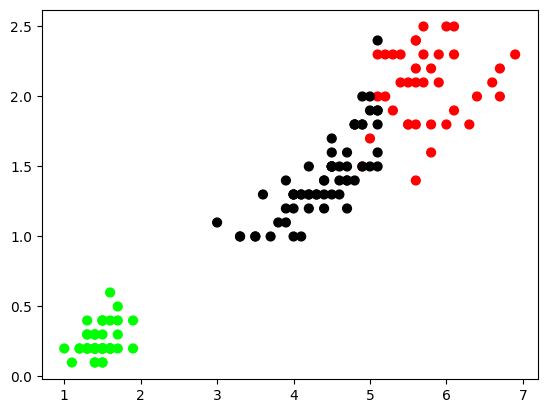

In [35]:
colormap = np.array(['red', 'lime','black'])
km = KMeans(n_clusters=3)
km.fit(x)
print(metrics.accuracy_score(km.labels_, y.target))
print(metrics.confusion_matrix(km.labels_, y.target))

plt.scatter(x.petal_length, x.petal_width, c=colormap[km.labels_],s=40)

0.9666666666666667


C:\Users\manit\OneDrive\Documents\appData\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


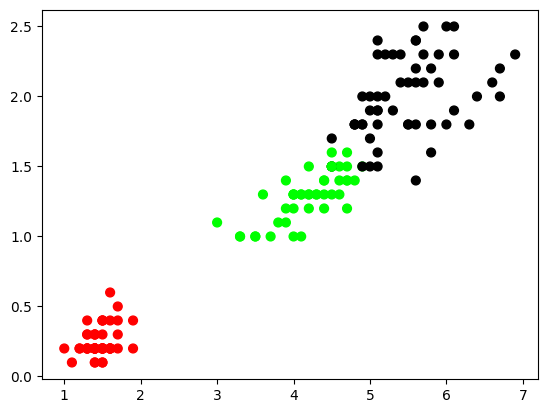

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xsa = scaler.fit_transform(x)
xs = pd.DataFrame(xsa, columns=x.columns)

gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_labels = gmm.predict(xs)
print(metrics.accuracy_score(gmm_labels, y.target))
plt.scatter(x.petal_length, x.petal_width, c=colormap[gmm_labels], s=40)
plt.show()

0.3

In [38]:
test = pd.read_csv(r"C:\Users\manit\Downloads\test.csv")
test

,outlook,Temp,hum,windy,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,yes
